In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/MSFT.csv')
df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/13/1986,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,3/14/1986,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,3/17/1986,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,3/18/1986,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,3/19/1986,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8520,12/31/2019,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,1/2/2020,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,1/3/2020,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,1/6/2020,157.080002,159.100006,156.509995,159.029999,159.029999,20813700


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(-2000.0, 0, '1/26/2012'),
  Text(0.0, 0, '3/13/1986'),
  Text(2000.0, 0, '2/7/1994'),
  Text(4000.0, 0, '1/16/2002'),
  Text(6000.0, 0, '12/24/2009'),
  Text(8000.0, 0, '12/5/2017'),
  Text(10000.0, 0, '')])

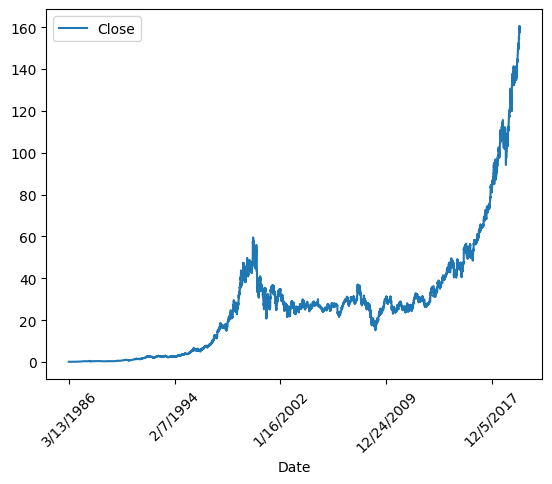

In [ ]:
df.plot(x="Date", y="Close")
plt.xticks (rotation=45)

In [ ]:
model=RandomForestRegressor()

In [ ]:
X = df[['Open','High','Low','Volume']]
X = X[:int(len (df)-1)]
y=df['Close']
y=y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [ ]:
predictions = model.predict(X)
print('The model score is:',model.score(X, y))

The model score is: 0.9999842822143648


In [ ]:
new_data =df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:',prediction)
print('Actual value is:',df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [158.53620111]
Actual value is: 157.580002


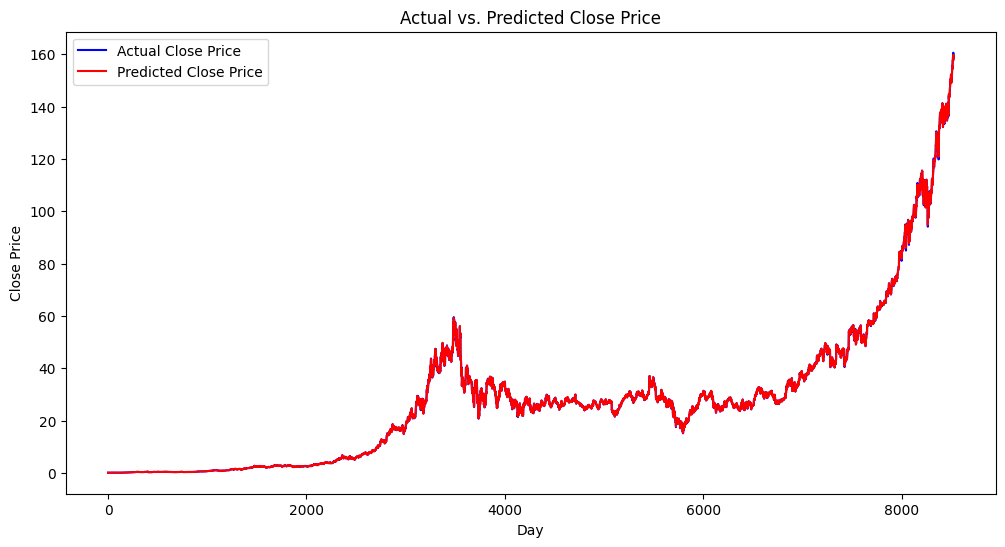

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Close Price', color='blue')
plt.plot(predictions, label='Predicted Close Price', color='red')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.show()

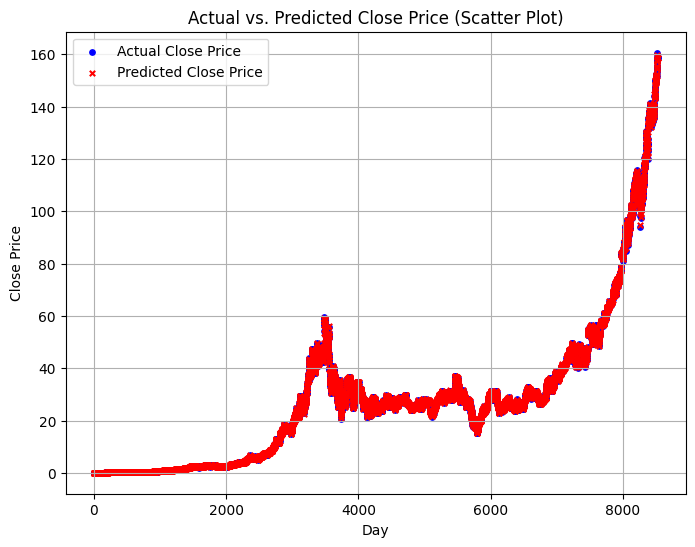

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), y, label='Actual Close Price', color='blue', marker='o', s=15)
plt.scatter(range(len(predictions)), predictions, label='Predicted Close Price', color='red', marker='x', s=15)
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()

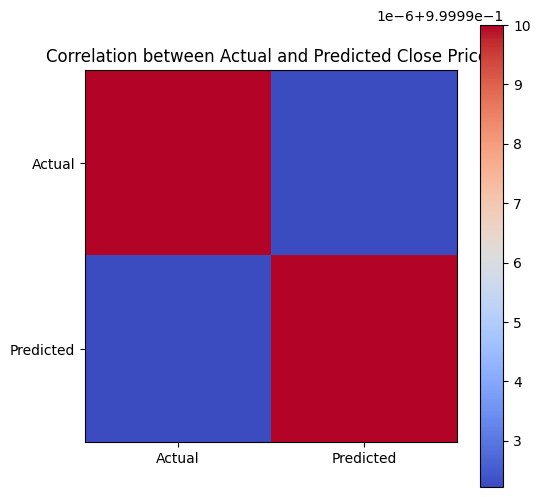

In [33]:
correlation = np.corrcoef(y, predictions)
plt.figure(figsize=(6, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation between Actual and Predicted Close Prices')
plt.xticks([0, 1], ['Actual', 'Predicted'])
plt.yticks([0, 1], ['Actual', 'Predicted'])
plt.show()